In [1]:
import numpy as np
import pydicom as dicom
import os
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("default")

from skimage.color import rgb2grey, label2rgb
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.feature import local_binary_pattern
from scipy.stats import itemfreq

from glob import glob

In [2]:
nodule_path = "/Users/adriano/Documents/Pulmão/Reducao de Falsos Positivos/nodulos/"
nn_path = "/Users/adriano/Documents/Pulmão/Reducao de Falsos Positivos/nn/"

In [3]:
nodule_files = glob(nodule_path + '*.dcm')
nn_files = glob(nn_path + '*.dcm')

nodule_dcm = [dicom.dcmread(file) for file in nodule_files]
nn_dcm = [dicom.dcmread(file) for file in nn_files]

In [4]:
nodule_imgs = []
nn_imgs = []
for dcm in nodule_dcm:
    if len(dcm.pixel_array.shape) > 2:
        for layer in dcm.pixel_array:
            nodule_imgs.append(layer)
    else:
        nodule_imgs.append(dcm.pixel_array)

for dcm in nn_dcm:
    if len(dcm.pixel_array.shape) > 2:
        for layer in dcm.pixel_array:
            nn_imgs.append(layer)
    else:
        nn_imgs.append(dcm.pixel_array)

# Calculando o LBP

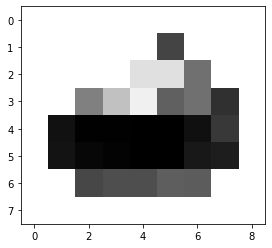

In [5]:
radius = 2
n_points = 8

lbp = local_binary_pattern(nodule_imgs[0], n_points, radius)

plt.imshow(lbp, cmap='gray')

# Exibindo o Histograma

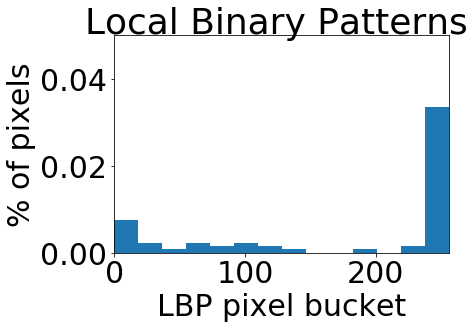

In [15]:
import matplotlib.pylab as plt
plt.rcParams.update({'font.size': 30})

fig, ax = plt.subplots()
fig.suptitle("Local Binary Patterns")
plt.ylabel("% of pixels")
plt.xlabel("LBP pixel bucket")

ax.hist(lbp.ravel(), density=True, bins=14, range=(0,256))
ax.set_xlim([0, 256])
ax.set_ylim([0, 0.050])

plt.savefig('fig_lbp_hist.svg')
plt.show()

In [37]:
output_path = "C:/Users/Adriano/Desktop/CSV/out.csv"

import csv

hist = np.unique(lbp.ravel(), return_counts=True)

with open(output_path, mode='w') as csv_file:
    field_names = ['Pixel Value', 'Frequency']
    
    writer = csv.DictWriter(csv_file, fieldnames=field_names)
    writer.writeheader()
    
    for i in range(len(hist[0])):
        writer.writerow({'Pixel Value': hist[0][i], 'Frequency': hist[1][i]})

# LBP em todas as imagens

In [16]:
output_path = "C:/Users/Adriano/Desktop/CSV/out.csv"

radius = 2
n_points = 8

import csv
with open(output_path, mode='w') as csv_file:    
    header = [' ']
    for i in range(256):
        header.append(i)
    
    writer = csv.writer(csv_file, delimiter=",", quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(header)
    
    for index in range(3):
        image = nodule_imgs[index]
        lbp = local_binary_pattern(image, n_points, radius)
        
        row = [index]
        
        hist = np.unique(lbp.ravel(), return_counts=True)
        
        for i in range(256):
            for j in range(len(hist[0])):
                row.append(hist[0][j])
                if i == hist[0][j]:
                    row.append(hist[1][j])
                else:
                    row.append(0)
        
        writer.writerow(row)
